In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.ensemble import RandomForestClassifier

In [7]:
digits=datasets.load_digits()

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
digits.target[0]

0

In [11]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

<Figure size 432x288 with 0 Axes>

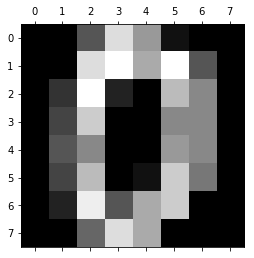

In [12]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

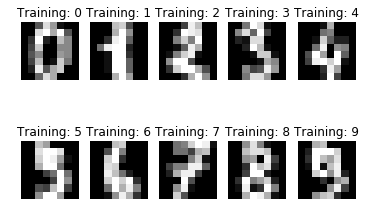

In [13]:
images_and_labels=list(zip(digits.images,digits.target))
for index, (image,label) in enumerate(images_and_labels[:10]):
    plt.subplot(2,5,index+1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Training: %i' %label)

In [14]:
digits.images.shape

(1797, 8, 8)

In [15]:
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data.shape

(1797, 64)

In [17]:
model=RandomForestClassifier(n_estimators=30,criterion='entropy')
model.fit(data[:n_samples//2],digits.target[:n_samples//2]) #only 50% of data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
expected=digits.target[n_samples//2:]
predicted=model.predict(data[n_samples//2:])

In [19]:
model.score(data[n_samples // 2:], expected)

0.9265850945494994

In [20]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  0  0  0  0  1  0]
 [ 0 84  0  0  0  1  0  0  0  6]
 [ 2  0 77  4  0  0  0  0  0  3]
 [ 1  1  1 79  0  2  0  0  7  0]
 [ 1  1  0  0 83  1  0  3  0  3]
 [ 0  0  0  0  0 85  2  0  0  4]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 86  3  0]
 [ 0  3  0  2  1  1  0  2 78  1]
 [ 1  0  0  3  0  3  0  0  2 83]]


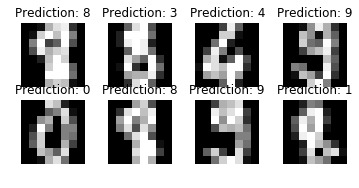

In [22]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(3, 4, index + 5)
    plt.axis('off')
    plt.imshow(image,  interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [24]:
import cv2

In [28]:
myimage=cv2.imread('download.png')
myimage.shape

(8, 8, 3)

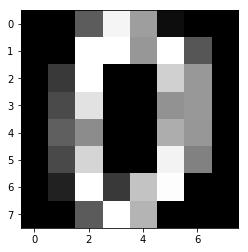

In [30]:
plt.imshow(myimage)

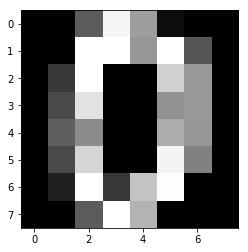

In [31]:
from skimage import color
from skimage import io
img = color.rgb2gray(io.imread('download.png'))
plt.imshow(img)

In [32]:
img.shape

(8, 8)

In [34]:
x=img.reshape((-1,64))
x.shape

(1, 64)

In [35]:
x

array([[0.        , 0.        , 0.36078431, 0.96078431, 0.61960784,
        0.05098039, 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.59215686, 1.        , 0.3372549 ,
        0.        , 0.        , 0.22352941, 1.        , 0.        ,
        0.        , 0.81568627, 0.59607843, 0.        , 0.        ,
        0.29019608, 0.88627451, 0.        , 0.        , 0.57254902,
        0.59607843, 0.        , 0.        , 0.37254902, 0.54901961,
        0.        , 0.        , 0.67843137, 0.59215686, 0.        ,
        0.        , 0.28627451, 0.83529412, 0.        , 0.        ,
        0.95294118, 0.50588235, 0.        , 0.        , 0.12941176,
        1.        , 0.22352941, 0.76470588, 0.99215686, 0.        ,
        0.        , 0.        , 0.        , 0.35686275, 1.        ,
        0.70588235, 0.        , 0.        , 0.        ]])

In [38]:
y=model.predict(x)
y

array([3])